In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/grid.h5"
tracks = pd.read_hdf(filename, "tracks")
tracks.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell
track                                                              
7000     0.92329  0.279311  0.001829  1.608258  0.000000   0.006041
7001     1.72329  0.229311  0.010871  2.308258  0.012396   0.006041
7002     2.12329  0.304311  0.004172  2.658258  0.015861   0.006041
7003     1.32329  0.254311  0.024469  1.958258  0.002481   0.006041
7004     1.12329  0.291811  0.006519  2.133258  0.000000   0.006041

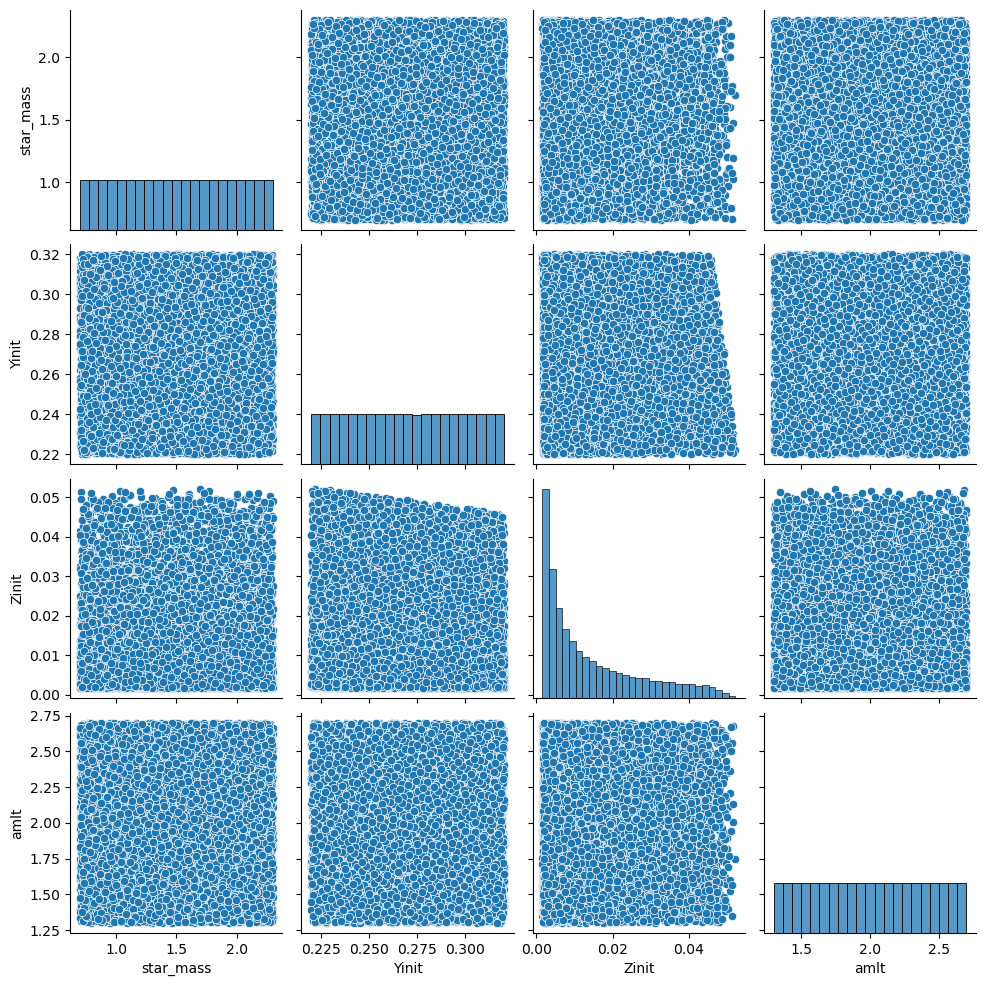

In [3]:
vars = ["star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(tracks, vars=vars);

In [4]:
stars = pd.read_hdf(filename, "stars")
stars.head()

star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  1     2.220454e+07  0.893151  6382.509287   0.718192 -45.291905   
      2     2.300916e+07  0.891027  6377.312552   0.718122 -45.308912   
      3     2.397470e+07  0.890320  6373.785487   0.718037 -45.328570   
      4     3.019433e+07  0.893682  6371.412400   0.717474 -45.392646   
      5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   

            log_Lnuc  Dnu_freq_o     eps_o  
track star                                  
7000  1     0.078416  148.565794  1.129515  
      2     0.077135  149.148739  1.131800  
      3     0.075916  149.362908  1.132830  
      4     0.075178  148.552167  1.130613  
      5     0.075810  148.331713  1.129892

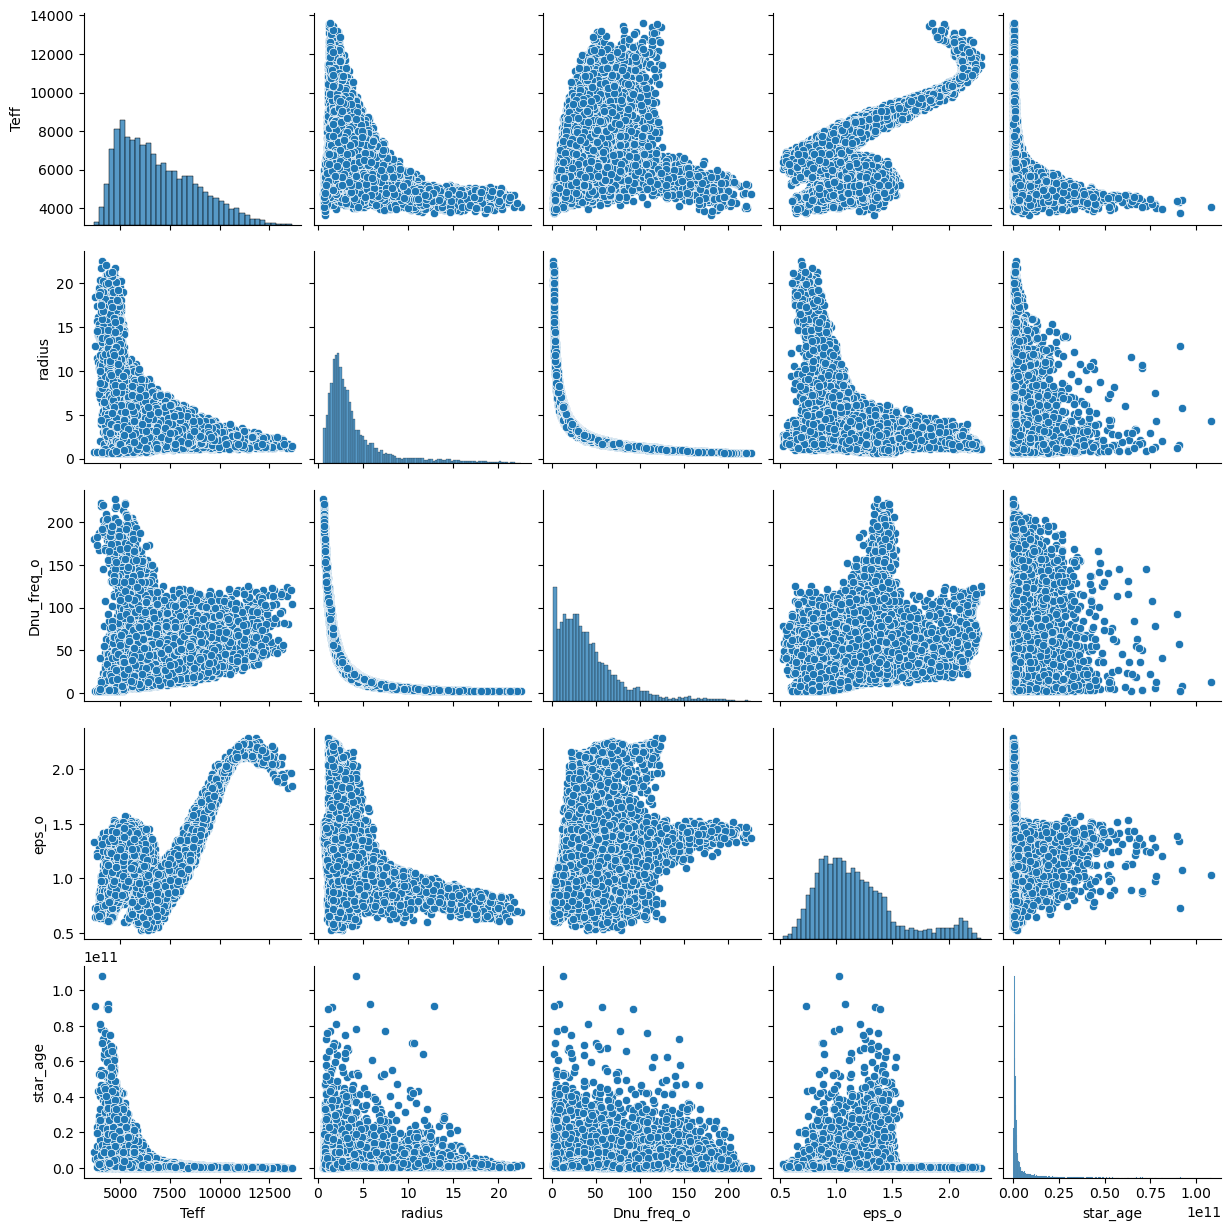

In [5]:
num_samples = 10000
vars = ["Teff", "radius", "Dnu_freq_o", "eps_o", "star_age"]
sns.pairplot(stars.sample(num_samples), vars=vars);

In [31]:
mask = (stars.star_age < 2e10)
grid = tracks.join(stars.loc[mask])

In [32]:
grid.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
track star                                                                 
7000  1       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      2       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      3       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      4       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      5       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

                star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  1     2.220454e+07  0.893151  6382.509287   0.718192 -45.291905   
      2     2.300916e+07  0.891027  6377.312552   0.718122 -45.308912   
      3     2.397470e+07  0.890320  6373.785487   0.718037 -45.328570   
      4     3.019433e+07  0.893682  6371.412400   0.717474 -45.392646   
      5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   

            log_Lnuc  Dnu_freq_o     eps_o  
track star                                  
7000  1     0.078416  148.565794  1.129515  
      2     0.077135  149.148739  1.131800  
      3     0.075916  149.362908  1.132830  
      4     0.075178  148.552167  1.130613  
      5     0.075810  148.331713  1.129892

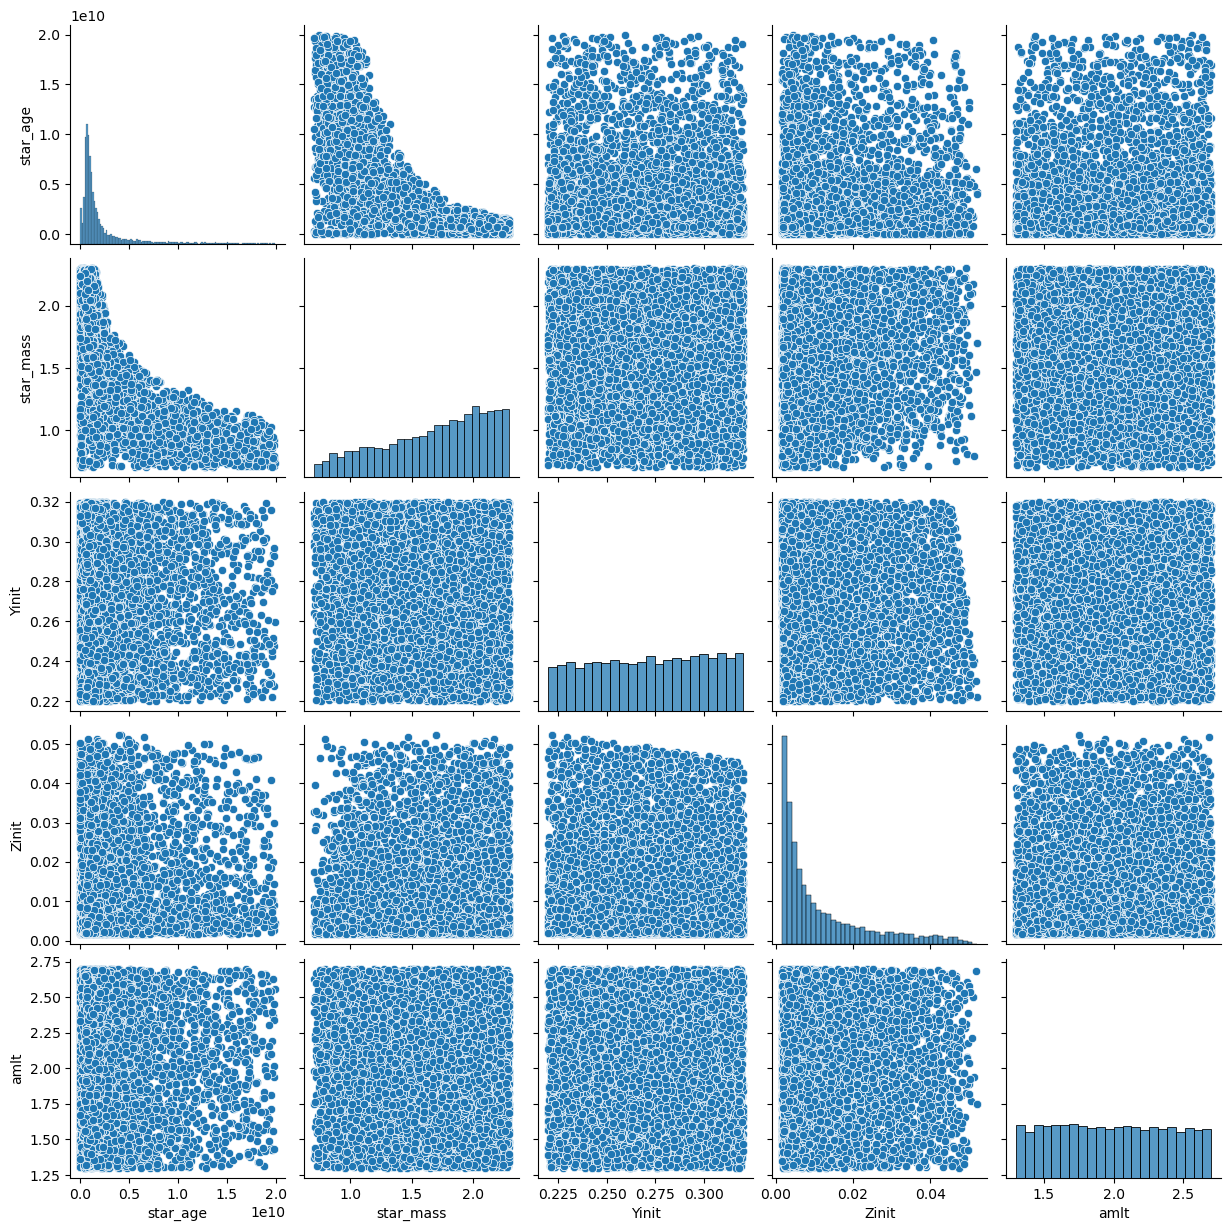

In [8]:
num_samples = 10000
vars = ["star_age", "star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

In [33]:
grid["log_Zinit"] = np.log10(grid.Zinit)
grid["log_age"] = np.log10(grid.star_age)

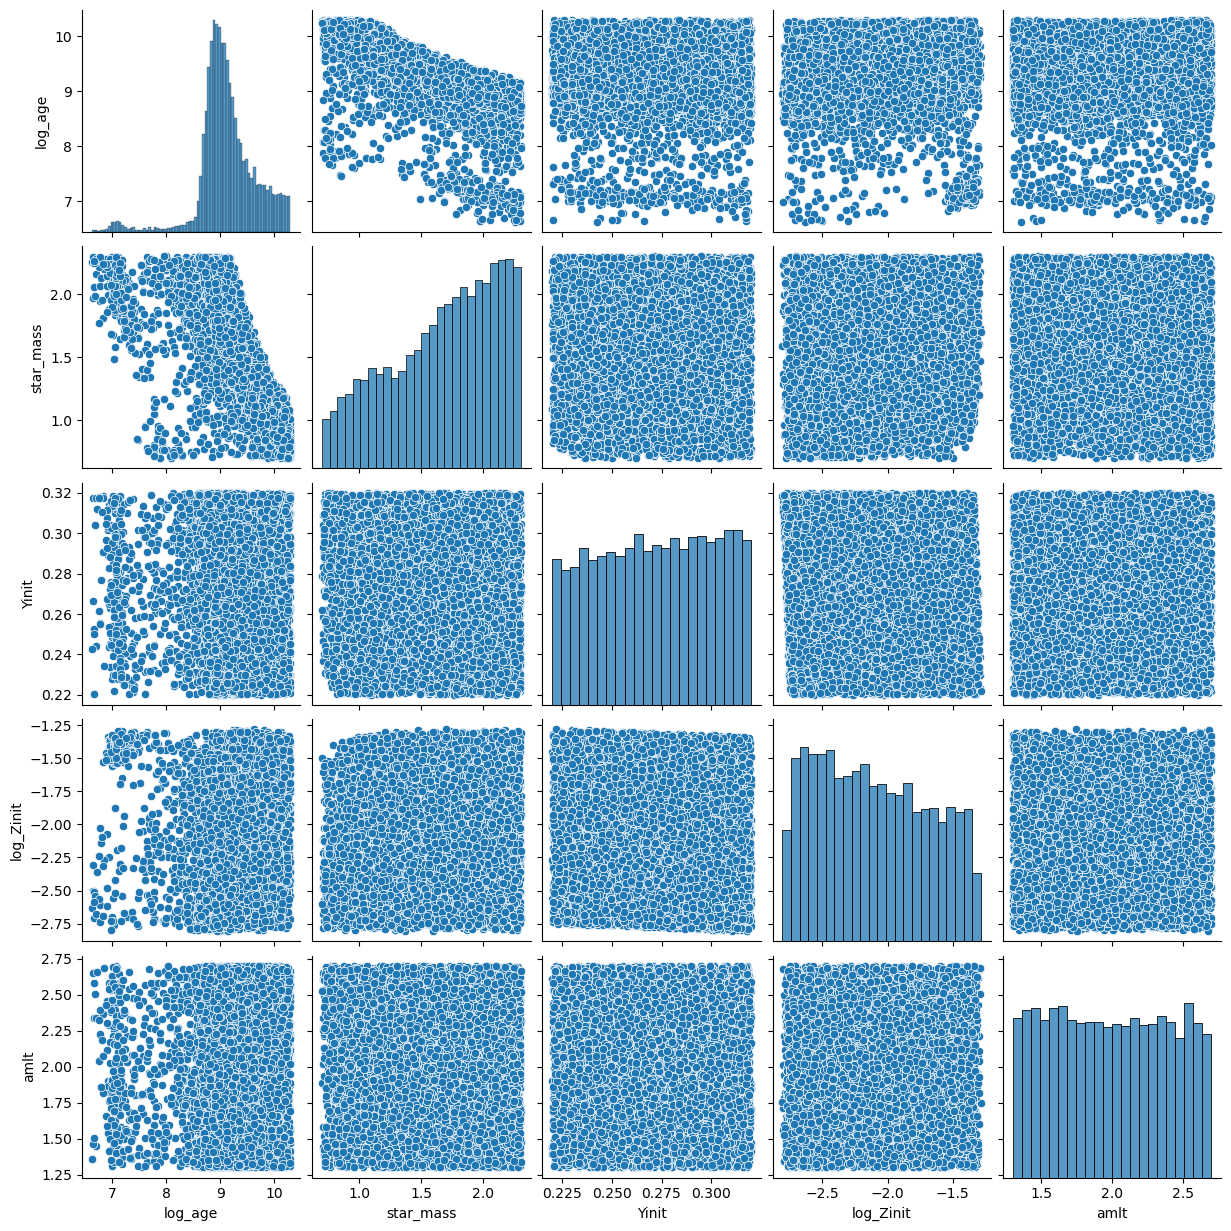

In [10]:
vars = ["log_age", "star_mass", "Yinit", "log_Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

What is the young age overdensity?

In [34]:
solar_teff = 5772.0034291
grid["L"] = grid["radius"]**2 * (grid["Teff"]/solar_teff)**4

In [35]:
grid["Lnuc"] = 10**grid["log_Lnuc"]

In [36]:
grid["f_nuc"] = grid["Lnuc"]/grid["L"]

In [37]:
grid["Xinit"] = 1 - grid.Yinit - grid.Zinit

In [38]:
grid["delta_X"] = grid["Xinit"] - grid.center_h1

In [43]:
thin = 1000
idx = grid.index.get_level_values("track").unique()[::thin]

In [44]:
idx[4]

2813

In [23]:
mask = grid["delta_X"] > 0.0015
grid = grid.loc[mask]

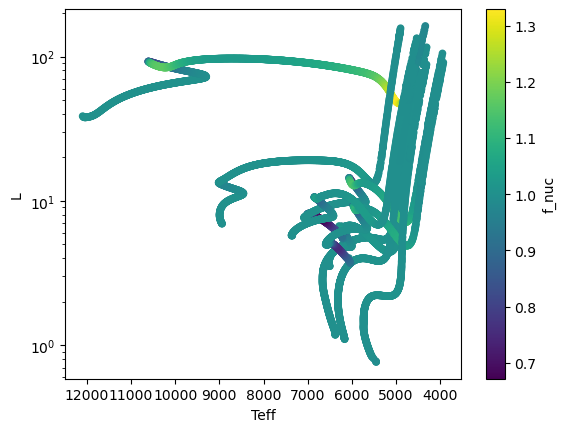

In [55]:
ax = grid.loc[idx].plot(x="Teff", y="L", c="f_nuc", kind="scatter")
ax.invert_xaxis()
ax.set_yscale("log")

Looks like we have some pre-MS points

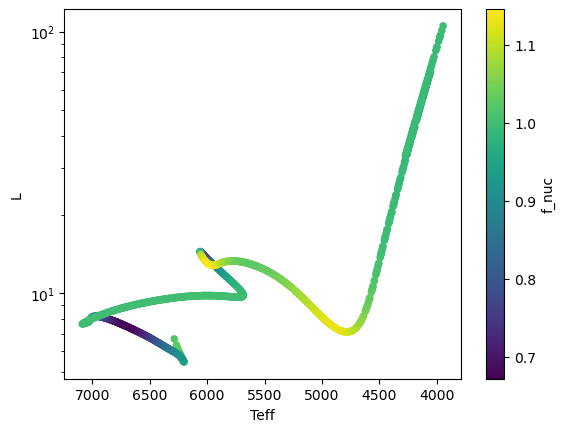

In [19]:
ax = grid.loc[idx[4]].plot(x="Teff", y="L", c="f_nuc", kind="scatter")
ax.invert_xaxis()
ax.set_yscale("log")

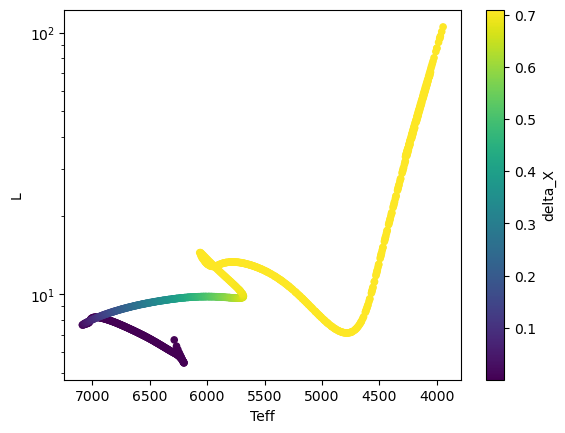

In [21]:
ax = grid.loc[idx[4]].plot(x="Teff", y="L", c="delta_X", kind="scatter")
ax.invert_xaxis()
ax.set_yscale("log")

## To Do

- Go through each track, condition delta_X > 0.0015
- Then choose first point where Lnuc/L > 0.999

In [50]:
idxs = []
for idx, group in grid.groupby(level="track"):
    mask = (group["f_nuc"] > 0.999) & (group["delta_X"] > 0.0015)
    idxs.append(mask.idxmax())
    # TODO: cut the points before this for each group

In [56]:
idxs

[(0, 8),
 (1, 4),
 (2, 6),
 (3, 1),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 5),
 (8, 5),
 (9, 3),
 (10, 6),
 (11, 4),
 (12, 3),
 (13, 233),
 (14, 2),
 (15, 5),
 (16, 6),
 (17, 3),
 (18, 5),
 (19, 9),
 (20, 2),
 (21, 4),
 (22, 5),
 (23, 5),
 (24, 8),
 (25, 182),
 (26, 4),
 (27, 2),
 (28, 2),
 (29, 4),
 (30, 2),
 (31, 10),
 (32, 10),
 (33, 75),
 (34, 6),
 (35, 9),
 (36, 2),
 (37, 3),
 (38, 2),
 (39, 6),
 (40, 3),
 (41, 5),
 (42, 2),
 (43, 4),
 (44, 2),
 (45, 3),
 (46, 2),
 (47, 8),
 (48, 6),
 (49, 3),
 (50, 6),
 (51, 2),
 (52, 2),
 (53, 248),
 (54, 6),
 (55, 7),
 (56, 7),
 (57, 5),
 (58, 7),
 (59, 4),
 (60, 1),
 (61, 3),
 (62, 3),
 (63, 10),
 (64, 12),
 (65, 3),
 (66, 3),
 (67, 17),
 (68, 4),
 (69, 4),
 (70, 2),
 (71, 9),
 (72, 1),
 (73, 166),
 (74, 7),
 (75, 3),
 (76, 2),
 (77, 3),
 (78, 2),
 (79, 8),
 (80, 13),
 (81, 3),
 (82, 10),
 (83, 2),
 (84, 2),
 (85, 4),
 (86, 2),
 (87, 12),
 (88, 7),
 (89, 4),
 (90, 5),
 (91, 2),
 (92, 3),
 (93, 125),
 (94, 2),
 (95, 13),
 (96, 8),
 (97, 4),
 (98, 5),


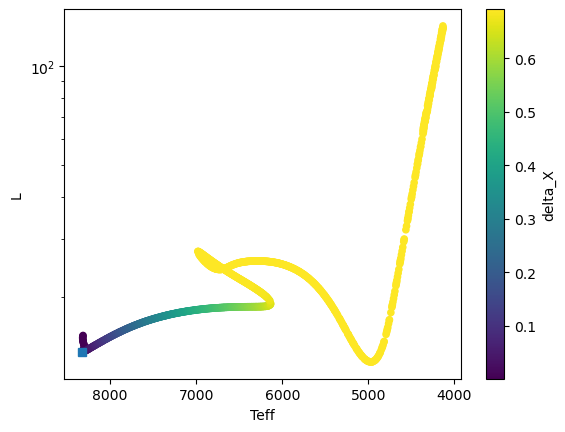

In [61]:
i = 13
ax = grid.loc[grid.delta_X > 0.0015].loc[idxs[i][0]].plot(x="Teff", y="L", c="delta_X", kind="scatter")
ax.plot(grid.loc[idxs[i], "Teff"], grid.loc[idxs[i], "L"], 's')

ax.invert_xaxis()
ax.set_yscale("log")

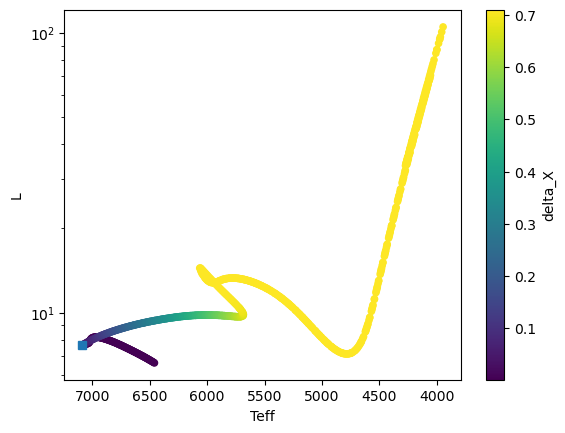

In [60]:
i = 2811
ax = grid.loc[grid.delta_X > 0.0015].loc[idxs[i][0]].plot(x="Teff", y="L", c="delta_X", kind="scatter")
ax.plot(grid.loc[idxs[i], "Teff"], grid.loc[idxs[i], "L"], 's')

ax.invert_xaxis()
ax.set_yscale("log")

Nice! That now avoids the little bit of nuclear burning on the pre-MS.

Now, just need to clean up the dataset by cutting points before this.